# The naïve Bayes classifier

Max Collard, May 2021

## 1: Probability is the volume of possibility

### Probability theory: The mathematical model

If I give you a quarter and a pencil, and I ask you, "What is the volume of *the quarter and the pencil*?", it may be somewhat difficult to actually find the answer in practice: you could use water displacement, or carefully measure all the dimensions and use a formula for a cylinder from geometry, etc. But, one thing you know right off the bat is that *the total volume of the quarter **and** the pencil* is *the volume of the quarter **plus** the volume of the pencil*. They're totally separate things, so I should be able to measure the volume of each thing *separately* and then just add them together.

Math gives symbols to everything. So, I'll lelt $\textrm{quarter}$ be my symbol for the quarter, and $\textrm{pencil}$ be my symbol for the pencil.

<img src="images/IMG_0109.jpg" />

The *overlap* between the quarter and pencil—that is, all of the stuff that is in both the quarter **and** the pencil at the same time—is their **intersection**. This is denoted $\cap$, and can be thought of as "*and*". We talked about this before, though: $\textrm{quarter}$ and $\textrm{pencil}$ don't overlap at all. They are **separate**. Their intersection is **nothing**. The symbol for nothing is $\varnothing$ (fancy zero), so we can write

$$ \textrm{quarter} \cap \textrm{pencil} = \varnothing $$

<img src="images/IMG_0110.PNG" />

The *combination* of the quarter and the pencil—that is, all of the stuff that is in **either** the quarter **or** the pencil—is their **union**. This is denoted $\cup$—U, like a union—and can be thought of as "*or"*. So, the thing that we were trying to find the volume of before was

$$ \textrm{quarter} \cup \textrm{pencil} $$

<img src="images/IMG_0111.PNG" />

What is "measuring a volume"? One way to think about it is that "volume" is a *rule*—give it the symbol $\textrm{volume}$—that assigns a number to each object. This can be thought of as a "black box" that takes in an object as input and spits out a number. The volume of my computer is $4$. The volume of my desk is $12$. Let's write these as

$$
\begin{eqnarray*}
\textrm{volume}(\textrm{computer}) & = & 4 \\
\textrm{volume}(\textrm{desk}) & = & 12
\end{eqnarray*}
$$

<img src="images/IMG_0112.PNG" />

Now, I don't know the volume of $\textrm{quarter}$ or $\textrm{pencil}$. But, from the intuition we talked about before, I do know something very important about what happens when I put them *together* (or, their *union*). The volume of $\textrm{quarter}$ and $\textrm{pencil}$ put together is their sum:

$$ \textrm{volume}(\textrm{quarter} \cup \textrm{pencil}) = \textrm{volume}(\textrm{quarter}) + \textrm{volume}(\textrm{pencil}) $$

<img src="images/IMG_0115.PNG" />

In fact, we can **generalize** this concrete example to apply in many more situations. Let's think of what happens when we have *any two "separate things"*, call them $A$ and $B$. Remember, "separate objects" means that their overlap is nothing, or,

$$ A \cap B = \varnothing $$

<img src="images/IMG_0117.PNG" />

There's nothing really different about $A$ and $B$ from $\textrm{quarter}$ and $\textrm{pencil}$: they're both "things", so we can measure their volume; and they're both **separate**, so if we want to *measure the volume of their combination*, we can *measure their volume individually*:

$$ \textrm{volume}(A \cup B) = \textrm{volume}(A) + \textrm{volume}(B) $$

<img src="images/IMG_0118.PNG" />

> Does this work if $A$ and $B$ are **not separate**—that is, if there is stuff in $A \cap B$? **No**. The reason is that if there is stuff that is in *both* $A$ and $B$, then this stuff will get **counted twice** when we measure the volumes: once when we measure the volume of $A$, and again when we measure the volume of $B$. Our measurement of the volume will be *too big*.

In fact, there's really no reason to stop at two things, is there? We could keep going, adding more and more "separate pieces" over and over:

$$ \textrm{volume}(A \cup B \cup C \cup \ldots) = \textrm{volume}(A) + \textrm{volume}(B) + \textrm{volume}(C) + \ldots $$

<img src="images/IMG_0119.PNG" />

This doesn't give us an actual *number* for the volume. But, this is a **huge** constraint on how the rule $\textrm{volume}$ behaves: any time that we can decompose a big thing into a bunch of small things that are **all separate from one another**, we can break up the daunting task of measuring the volume of the big thing into the much more manageable task of measuring the individual volumes of all the small parts. If I wanted to measure the actual volume taken up by a car, I could deconstruct the entire car into all its small pieces, measure the volume of every one of those parts, and then add those numbers all back together. The fact that $\textrm{volume}$ *is constrained* in this way enables us to *break big, hard problems into small, easy subproblems* and then cram the results together.

This is the *defining characteristic* of probability: **probability is the "volume" of possibility**.

Suppose you're running a single trial of a T maze with a mouse. Out there in the multiverse (or quantum superposition, or whatever sci-fi analogy we want to make) there are realities where the mouse goes left, and there are realities where the mouse goes right. And there are way more than two realities, right?—there are realities where the mouse gets distracted midway through and stops for a second, realities where the mouse realizes the reality of class struggle at the precise moment you're running that trial and rises up to lead a revolution against their human overlords and we get Planet of the Mice, and so on.

<img src="images/IMG_0120.PNG" />

There are lots of different *possibilities* of what "*could*" *happen*. By convention, let's call the set of **every single possible reality** $\Omega$.

<img src="images/IMG_0121.PNG" />

So talking about individual possible realities seems hard. But, one thing we *can* do is group a bunch of "related" realities together by some common characteristic they all share. For example, we could talk about *the set of all realities in which the mouse first goes left*; let's give this the symbol $L$. We could also talk about *the set of all realities in which the mouse first goes right*; similarly, we'll call this set $R$. (Although Revolutionary Mouse is definitely possible somewhere out there in the 11-dimensional cosmos, for the sake of simplifying what's going on I'm going to *assume* that at some point the mouse goes either left or right; so, *every reality is in either $L$ or $R$*, or, *the combination of $L$ and $R$ is the set of all possible realities*; in symbols, $L \cup R = \Omega$.)

Now, I also carefully chose the words I used (namely, the "first" direction that the mouse goes) for $L$ and $R$ so that *no reality can be in both $L$ and $R$*: the nature of "firstness" implies that the choice is unique. So, $L$ and $R$ do *not overlap at all*; in symbols,

$$ L \cap R = \varnothing $$

<img src="images/IMG_0122.PNG" />

Now that we have a nice concrete setup, let's bring in probability. Probability—almost completely analogous to $\textrm{volume}$—is a rule that takes as input *a set of possible realities* and gives back a *number* telling us **how big** that set is *relative to* the size of the entire multiverse of possible worlds. The symbol I use for probability is $\textrm{Pr}$, although there's a lot of variation in the notation.

<img src="images/IMG_0123.PNG" />

Because $\textrm{Pr}$ is relative, we have to give some number to the set of every possible realities, $\Omega$. This is completely arbitrary and makes no difference to anything that we do later, except maybe making the actual numbers we get at the end a little bigger or smaller (and really, this is math—we don't care about numbers at all, except maybe [number theoriests](https://en.wikipedia.org/wiki/Ulam_spiral)). But a lot of people use 1 because it makes probabilities kind of like "fractions", so let's do that:

> #### Axiom
> $\textrm{Pr}(\Omega) = 1$

<img src="images/IMG_0124.PNG" />

> Notice that this is an **axiom**, or *assumption*, about $\textrm{Pr}$. There's nobody on high who told me that I have to do this. I am making up the rule $\textrm{Pr}$ in my head, and so I can imagine it however I want. I **decided** that I wanted it to behave in this way because it is convenient to **me**.

So that gives us the "biggest" probability—the "volume" of the entire multiverse.

Now, as I mentioned earlier, I want **probability to behave just like $\textrm{volume}$**. The central defining characteristic of $\textrm{volume}$ was that *separate objects' volumes add together*. So, I'm going to make probability do the same thing:

> #### Axiom
> If $A$ and $B$ are two sets of possible realities that **do not overlap** ($A \cap B = \varnothing$) then
>
> $$ \mathrm{Pr}(A \cup B) = \mathrm{Pr}(A) + \mathrm{Pr}(B) $$

<img src="images/IMG_0125.PNG" />

So, any time we can decompose a set of realities into individual **parts** that don't overlap with each other, we can break up the problem of measuring the probability of the *big* set (which is usually "hard" in some way) into a bunch of smaller (and hopefully "easier") problems, and then add up all the results. This is just a generalization of the intuition we had for measuring the volumes of two separate physical objects: again, this motivates the intuition that **probability is the volume of possibility**.

> In a much bigger, more abstract sense, the fundamental essence of **everything in math** is about breaking down big, hard problems into a bunch of small, easy problems. $\sqrt{1764}$ is hard; I don't know how to do that just looking at the number. But $\sqrt{2^2\cdot3^2\cdot7^2}$ is doable: I know it's $2\cdot3\cdot7 = 42$. The fact that $1764$ can be decomposed this way makes solving this problem easier.
>
> Editorializing a little bit, I think that this tells us something very general about the way people represent knowledge. Instead of writing all of this, I could have just written down the definition of the "Naïve Bayes classifier" in one sentence. But that wouldn't really be very helpful: no matter how long one stares at that definition, without any context, it's never going to *make any sense* to a person. It needs to be broken down into smaller parts that are individually understandable—pieces that can then be *assembled together* to get the whole idea.
>
> Going back to the case of $\mathrm{Pr}$, since we are constructing it in our own minds anyway, we can **build into its definition** the ability to simplify problems involving sets that can be split up into parts. We are *imagining a tool that makes our lives easier*.

<img src="images/IMG_0126.PNG" />

The two axioms (and, getting a little into the weeds, going one step further by saying the "breaking up" process [works for an infinite number of parts](https://en.wikipedia.org/wiki/Sigma_additivity#%CF%83-additive_set_functions)) tell us everything we could ever know about probability. And crucially, these axioms were built from *our own choices* about how we *wanted* probability to behave: we told it to act like "volume" or "size", and we told it precisely how big we want the entire universe to be.

For example, notice that $\varnothing$ "has nothing in it", so that for any set $X$, $X \cup \varnothing$ (the combination of $X$ and *nothing*) is always $X$; this means that

$$ 1 = \mathrm{Pr}(\Omega) = \mathrm{Pr}(\Omega \cup \varnothing) = \mathrm{Pr}(\Omega) + \mathrm{Pr}(\varnothing) = 1 + \mathrm{Pr}(\varnothing) $$

So, if we subtract 1 from the left and right, this means that

$$ 0 = \mathrm{Pr}(\varnothing) $$

The "smallest" set, $\varnothing$, has the "smallest" probability, 0. Cool, makes sense. But we didn't need to *specify* that: it is a **necessary consequence** of the *essence of volume* that we built into $\mathrm{Pr}$. For volume to be volume, it must always be the case that "'nothing' has no volume".

As another example, from our mouse in the T maze, we defined the sets $L$ ("all the realities where the mouse goes to the left") and $R$ ("all the realities where the mouse goes to the right") so that *no reality can be in both at the same time*, or in symbols, $L \cap R = \varnothing$. That is, **$L$ and $R$ are separate**. We also know that *every reality is in either $L$ or $R$*; in symbols,

$$ L \cup R = \Omega $$

If we apply $\mathrm{Pr}$ to both sides, we know then that

$$ \mathrm{Pr}(L \cup R) = \mathrm{Pr}(\Omega) $$

But because $L$ and $R$ are separate, we know from how we defined $\mathrm{Pr}$ that

$$ \mathrm{Pr}(L \cup R) = \mathrm{Pr}(L) + \mathrm{Pr}(R) $$

Since we also defined $\mathrm{Pr}$ so that $\mathrm{Pr}(\Omega) = 1 $, putting these formulas together, we have another constraint on the "size" of $L$ and $R$:

$$ \mathrm{Pr}(L) + \mathrm{Pr}(R) = 1 $$

So, knowing a few things about our experimental setup (the mouse *must* make a choice, and the mouse can only make *one* choice) allows us to determine *numerical rules* that the "sizes" of different possibilities must obey. Probability allows us to connect known facts about how reality works to *numbers*.

<img src="images/1/IMG_0150.PNG" />

### Conditioning: Restricting probability to a smaller multiverse

You wake up in the morning, and once you've run through your routine and are ready to go, you have to make a critical decision: "*Do I bring an umbrella?*"

There are many possible universes that today could belong to; in some of them it is raining, and in some of them it is not. What you really want to know is, **what universe do we live in**? In general, it's impossible to *completely* localize ourselves in the multiverse, because doing that would require us to perfectly know every detail of every atom in existence. But, what we *can* do is talk about **the size of different possibilities** within the multiverse: this is precisely *probability*, as we saw above! Intuitively, the *larger* ("more probable" or "more likely") a set of possible universes is, the more confident we can be that we live in one of them.

<img src="images/1/IMG_0146.PNG" />

In this case, we want to know

$$ \mathrm{Pr}(\textrm{it is raining}) $$

This is the **size** of all of the possible universes in which it is raining today. If this is large, then we would *expect* that if we step outside, it will be raining.

We can get a rough idea of this using **prior knowledge**. If you [look at the data on Wikipedia](https://en.wikipedia.org/wiki/San_Francisco#Climate), it loos like in San Francisco, it rains about 71.2 days out of the year; so, my *belief* of $\mathrm{Pr}(\textrm{it is raining})$ would be something like

$$ \mathrm{Pr}(\textrm{it is raining}) = \frac{71.2}{365} = 0.195 $$

<img src="images/1/IMG_0147.PNG" />

However, if you have an outward-facing window, you can do a lot better than this: you have **data**. Let's say you look out the window and see that *it is sunny*. This means that **you know for sure that you are in the part of the multiverse where it is sunny**, which we can call $\textrm{it is sunny}$.

It doesn't really make sense anymore to talk about $\mathrm{Pr}(\textrm{it is raining})$, because as we defined $\mathrm{Pr}$ before, this is the size of $\textrm{it is raining}$ **relative to the entire multiverse**. Now that we *know for sure* that we're in the smaller set $\textrm{it is sunny}$, what we really want to know is the size of $\textrm{it is raining}$ relative to **where we now know that we live**, the set $\textrm{it is sunny}$.

<img src="images/1/IMG_0148.PNG" />

What we really want to do is to **define a new ruler**—let's call it $\mathcal{R}$ for now—in which $\textrm{it is sunny}$ is now the whole multiverse we're thinking about. To do this, first we need to adjust all the sizes of everything: since $\textrm{it is sunny}$ is the new "largest size", we should make it so that

$$ \mathcal{R}(\textrm{it is sunny}) = 1 $$

Great, so we decided the "new size" of one particular set. How do we find the size $\mathcal{R}(A)$ of some other set, $A$? We have to be a little careful about how we do this, because $A$ might have pieces that *are not in $\textrm{it is sunny}$*. We only care about the size of $A$ **inside of $\textrm{it is sunny}$**; all of the other bits of the set $A$ that are in other parts of the multiverse don't matter to anymore. How do we "pick out" only the part of $A$ that *overlaps* with $\textrm{it is sunny}$? We have the right tool for this: it is the **intersection**

$$ A \cap \textrm{it is sunny} $$

One way we could decide to define the "new size" of $A$ is to take this intersection—the part of $A$ we care about—and just "scale it up" so that $\textrm{it is sunny}$ has size 1 the way we want. To do this, we define

$$ \mathcal{R}(A) = \frac{\mathrm{Pr}(A \cap \textrm{it is sunny})}{\mathrm{Pr}(\textrm{it is sunny})} $$

<img src="images/1/IMG_0151 2.PNG" />

This works: if $A$ is $\textrm{it is sunny}$, then the result is

$$ \mathcal{R}(\textrm{it is sunny}) = \frac{\mathrm{Pr}(\textrm{it is sunny} \cap \textrm{it is sunny})}{\mathrm{Pr}(\textrm{it is sunny})} = \frac{\mathrm{Pr}(\textrm{it is sunny})}{\mathrm{Pr}(\textrm{it is sunny})} = 1 $$

> On top of this, you can also show that this new ruler $\mathcal{R}$ also has the "splitting up" property from above, where two "separate" sets $X$ and $Y$ always have
>
> $$ \mathcal{R}(X \cup Y) = \mathcal{R}(X) + \mathcal{R}(Y) $$
>
> So $\mathcal{R}$ still intuitively "measures volume", just like $\mathrm{Pr}$; the only difference is that we've replaced the original multiverse $\Omega$ with a new, smaller multiverse: $\textrm{it is sunny}$.

It ends up being useful to do this "scaling up" process with some arbitrary set $B$ being the new "multiverse"; because of this, rather than making a new symbol like $\mathcal{R}$ every time we make a new ruler, it is useful to make a more general symbol for this process. The **size of $A$ relative to $B$** is denoted

$$ \mathrm{Pr}(A \mid B) = \frac{\mathrm{Pr}(A \cap B)}{\mathrm{Pr}(B)} $$

This is read "the probability of $A$ **given $B$**", because as we saw above, we can see this as re-defining our idea of "volume" once we *know* that we live in a particular part of the multiverse, $B$. The process of re-defining the sizes of sets relative to $B$ is known as **conditioning on $B$**; in general, we call any "new ruler" we build in this way **conditional probability**.

<img src="images/1/IMG_0152 2.PNG" />

So, in our example above, once we have the *knowledge* that we live in the part of the multiverse where it is sunny, this *changes our belief* about whether it is raining; for example, we might have that

$$
\begin{eqnarray*}
\textrm{Our prior belief: } & \quad & \mathrm{Pr}(\textrm{it is raining}) = 0.195 \\
\textrm{Our updated belief: } & \quad & \mathrm{Pr}(\textrm{it is raining} \mid \textrm{it is sunny}) = 0.005
\end{eqnarray*}
$$

It *might* be raining if it's sunny, but the chance is *very small*; it would have to be a sunshower (or "fox's wedding", one of the related terms). The fact that we saw that it is sunny outside **changed our belief** about whether it is raining pretty drastically.

<img src="images/1/IMG_0149.PNG" />

### Independence: Knowing one does not affect the other

Gaining knowledge of one thing does not always change our beliefs about something else. For example, our poor little mouse running the T maze can't see whether it is sunny outside, and so whether or not it is sunny **doesn't change whether the mouse goes left**; that is,

$$
\begin{eqnarray*}
\textrm{Our prior belief: } & \quad & \mathrm{Pr}(\textrm{the mouse goes left}) = 0.6 \\
\textrm{Our updated belief: } & \quad & \mathrm{Pr}(\textrm{the mouse goes left} \mid \textrm{it is sunny}) = 0.6
\end{eqnarray*}
$$

We say that the two sets $\textrm{the mouse goes left}$ is **independent of** $\textrm{it is sunny}$, because knowledge of $\textrm{it is sunny}$ does not impact the relative size of $\textrm{the mouse goes left}$.

<img src="images/1/IMG_0153.PNG" />

In general, given two sets of worlds $A$ and $B$, we say that $A$ is **independent of $B$** (sometimes written $A \perp B$) if

$$ \mathrm{Pr}(A \mid B) = \mathrm{Pr}(A) $$

Interestingly, because we defined conditional probability as

$$ \mathrm{Pr}(A \mid B) = \frac{\mathrm{Pr}(A \cap B)}{\mathrm{Pr}(B)} $$

this can be re-arranged to be equivalently defined as

$$ \mathrm{Pr}(A \cap B) = \mathrm{Pr}(A)\,\mathrm{Pr}(B) $$

> This is the usual definition of independence found in most textbooks.

In this case, we see that independence is another way that we can "simplify" probabilities, exactly the same as we did when we designed probability to add for "separate" sets: if $A$ and $B$ are *separate* sets, their probabilities *add*; if $A$ and $B$ are *independent* sets, their probabilities *multiply*.

> This is a little like "prime factorization" in a way: reiterating an earlier example, $\sqrt{1764}$ is quite hard by itself, but being able to reduce $1764$ to $2^2\cdot3^2\cdot7^2$ makes the problem a lot simpler.
>
> There is nothing magical about the fact that this happens: *independence* was **designed to have this simplifying property**. Once again, we are *building tools that make our lives easier*.

<img src="images/1/IMG_0154.PNG" />

**Separateness** and **independence** are two properties that allow us to *simplify* problems. *Separateness* allows us to decompose a problem into a *sum* of **non-overlapping** parts. *Independence* allows us to decompose a problem into a *product* of **overlapping** parts.

### Ok, so what even *is* probability?

That's great, we set up a bunch of rules that describe how probability works—that is, the **theory**. Now I can push symbols around and around to find new things that "are implied" by the axioms we set out above. But what does probability even **mean**?

The answer, weirdly, is that [people don't really know](https://en.wikipedia.org/wiki/Probability_interpretations). There are, however, two broad camps that have developed for trying to understand what the numbers that we get out of the theory actually mean.

#### Frequentism: Probability is the fraction of the time that something happens

**Frequentism** is the belief that probability tells us something about *what actually happens*. Probability theory originated with the study of *gambling* —science always starts where the money is. The idea was that every "random observation" is like one round of a casino game, and the entire setup can be cloned and repeated many times: for example, someone playing roulette can spin the wheel again, and again, and again, getting that sweet, sweet dopamine hit every time. To a close enough approximation, each one of these spins is "the same setup", even though the *outcome* that the gambler actually gets each time is different. In our analogy with the "multiverse" of T maze realities, this roughly translates into the idea that, when the mouse *actually does something*, we can write down the "reality" that occurred, rewind the mouse's "timeline", and then "re-do" the same T maze with the same multiverse of possible realities, over and over again, keeping track of which reality *actually happens* each time.

From the frequentist point of view, randomness is kind of like imagining the space of all possible realities as being a giant dart board. If we throw darts totally randomly at the board, over and over again, many, many times, the number of darts that show up in a particular "region" of the dart board—that is, in one *set of possible realities* —is proportional to the *size* of the region: the "bigger" the region, the more darts are going to "land" there.

> When I play darts, the result is basically completely random, and I can tell you first-hand that I end up hitting one of the giant outer sections *way* more often than I hit the bullseye.

But that "size", as we constructed above, is exactly what **probability** measures: we explicitly built it to be that way! So, using the example of our T maze above, if we successfully "rewind and do-over" our trial many times (thinking of each "do-over" as one "dart throw"), then $\mathrm{Pr}(L)$ (which is the *size* of the "region of the multiverse in which the mouse turns left", in our imaginary dartboard) should exactly be **the fraction of do-overs in which we observe that mouse turns left**.

When you write down what this view would imply about the "mechanism" of randomness in the real world, it sounds completely absurd: we don't have time travel, we don't get to "do-over" certain parts of our lives (as great as that would be, for science and otherwise). But *empirically*, this result seems to be true enough to be useful.

Let's try it with an example of *actual* area: people have known for a long time that the area of a circle is $\pi\,r^2$, where $r$ is the radius of the circle. Let's imagine that our "multiverse" $\Omega$ is a square whose side length is $1$, and that we're interested in a smaller set of realities, call it $A$, which is a circle of radius $1/2$ crammed inside of the square. What, then, is $\mathrm{Pr}(A)$? Well, it "should" be the area of the circle, which from the area formula is

$$ \mathrm{Pr}(A) = \pi\,(1/2)^2 \approx 0.785398 $$

We could actually test this with a square dartboard with a circle painted inside; for the sake of speed, though, we can have a computer do the work:

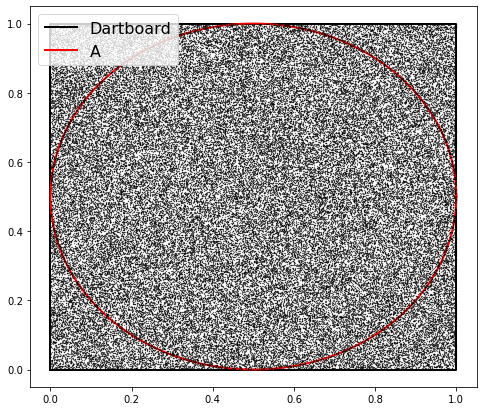

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# The number of darts we'll throw
n_darts = 100000

# Define the circular region A
x_A_center = 0.5
y_A_center = 0.5
r_A = 0.5

# The x- and y-coordinates of each dart throw are chosen uniformly
# between 0 and 1, totally randomly
xs = np.random.uniform( low = 0.,
                        high = 1.,
                        size = (n_darts,) )
ys = np.random.uniform( low = 0.,
                        high = 1.,
                        size = (n_darts,) )

# Count the number of darts that landed "inside A"
n_inside_A = 0
for i in range( n_darts ):
    # Get the current x and y position of this dart throw
    x_cur = xs[i]
    y_cur = ys[i]
    
    # Measure the distance from the current position to the center of A
    dist_cur = np.sqrt( (x_cur - x_A_center) ** 2. + (y_cur - y_A_center) ** 2. )
    
    # The current dart is inside A if this distance is less than the radius of A
    if dist_cur < r_A:
        n_inside_A += 1

## Plot out the throws, for fun

plt.figure( figsize = (8, 7) )

# Plot the dartboard using its corners
plt.plot( [0, 0, 1, 1, 0], # x
          [0, 1, 1, 0, 0], # y
          'k-',
          linewidth = 2.,
          label = 'Dartboard' )

# Plot the circle, A, of radius 0.5 and center (0.5, 0.5)
t_A = np.arange( 0,
                 2 * np.pi + 0.01,
                 0.01 )
x_A_boundary = r_A * np.cos( t_A ) + x_A_center
y_A_boundary = r_A * np.sin( t_A ) + y_A_center
plt.plot( x_A_boundary,
          y_A_boundary,
          'r-',
          linewidth = 2.,
          label = 'A' )

# Plot the darts
plt.plot( xs,
          ys,
          'k.',
          markersize = 0.5 )

# Add a legend
plt.legend( fontsize = 16 )

plt.show()

Here, each one of the black dots is one dart throw.

Let's see what this simulation got for the area:

In [52]:
# The probability of A should be the fraction of darts that land inside A
print( f'Pr(A) = {n_inside_A / n_darts}' )

Pr(A) = 0.78523


Pretty close! The measurement isn't *perfect*—after all, it is still *random*—but the critical feature is that it gets better the more "darts" you use:

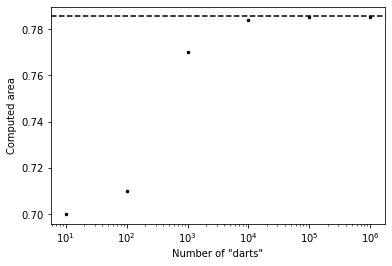

In [25]:
def dart_sim( n_darts ):
    
    xs = np.random.uniform( low = 0.,
                            high = 1.,
                            size = (n_darts,) )
    ys = np.random.uniform( low = 0.,
                            high = 1.,
                            size = (n_darts,) )
    
    n_inside_A = 0
    for i in range( n_darts ):
        x_cur = xs[i]
        y_cur = ys[i]
        dist_cur = np.sqrt( (x_cur - x_A_center) ** 2. + (y_cur - y_A_center) ** 2. )
        if dist_cur < r_A:
            n_inside_A += 1

    return n_inside_A / n_darts

# Try the simulation with a bunch of different numbers of darts
n_darts_test = [10, 100, 1000, 10000, 100000, 1000000]
pr_A_test = [ dart_sim(n) for n in n_darts_test ]
pr_A_true = np.pi * 0.5 * 0.5

# Plot the results

plt.figure( figsize = (6, 4) )

plt.semilogx( n_darts_test,
              pr_A_test,
              'k.',
              markersize = 5 )

# Plot the "true" value
xl = plt.xlim()
plt.plot( xl,
          [pr_A_true, pr_A_true],
          'k--' )
plt.xlim( xl )

plt.xlabel( 'Number of "darts"' )
plt.ylabel( 'Computed area' )

plt.show()

> The empirical observation that frequentism "works" has very important consequences for computation. Many probabilities are *extremely* difficult to directly compute; but, the underlying random system is actually relatively easy to *simulate* on a computer (for the above, the "simulation" was just a random choice of $x$ and $y$ coordinate), and then *check* if the simulated result falls into the set we're trying to find the probability for (here, we were checking that the "dart" fell inside of the red circle, $A$). If that is the case, we can *approximate* the value of the (difficult to find) "true probability" by performing this *simulate-then-check* procedure many, many times: if we run the simulation enough times, the *fraction of simulations that fall inside the set we're looking for* (that is, the number of "darts" inside of the "target region") will be very close to the true probability—and, we can always make our result better by throwing more darts. This procedure is known as **monte carlo simulation**.

#### Bayesianism: Probability is a measure of knowledge

When you watch the weather channel, they don't say, "if you re-live tomorrow over and over again, in 80% of those do-overs, it rains". They say, "there's an 80% chance of rain tomorrow". That's because we only get to live tomorrow once: either *it rains* or *it doesn't*. This is the major drawback of frequentism: we don't actually get the chance to "do-over" many copies of an identical experiment in many fields, outside of maybe gambling and particle physics.

In the **Bayesian** interpretation of probability, the "sizes" we get from $\mathrm{Pr}$ don't really tell us something about objective reality; they're *really* a measure of **human knowledge** (or lack thereof). In a Bayesian framework, we have some **prior belief** about whether or not we live in some set of realities $A$, which is "encoded" in the size of $A$ as

$$ \mathrm{Pr}(A) $$

When we obtain **data** (or **knowledge**, or **information**, or a million other terms people use for the same concept), this allows us to "locate ourselves" within some smaller part of the multiverse that matches our observations; we can call this smaller part of the multiverse $\mathcal{D}$ (for **d**ata). Obtaining this data **changes our belief** about whether we are living inside of the region $A$ we're interested in; this change is "encoded" in the **conditional probability of $A$ given $\mathcal{D}$**,

$$ \mathrm{Pr}(A \mid \mathcal{D}) $$

As scientists, we come up with **rules** for how to "intelligently" (or not-so-intelligently) *update our beliefs* about whether certain things are true given new data. The hope is that, as we gain more and more new knowledge, we will eventually be able to confidently decide whether our reality lies in region $A$: that is, data enables us to **find ourselves within the multiverse**.